# Practice Geopandas
## Author: Vishwajeet Shelar(vys)

# Import initial libraries

In [1]:
import pandas as pd
import numpy as np
import os
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import getct
import shapely
import matplotlib.pylab as plt
# import seaborn
%matplotlib inline

# Download Census Tract file in PUIdata

In [2]:
getct.getct()

Folder with required files in PUIdata, you can continue


# Setup the Co-ordinate system and get Brooklyn Census Tract data

In [3]:
shape_path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.to_crs(epsg=4326, inplace=True)

In [4]:
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_shape_brooklyn.reset_index(inplace=True)
ct_shape_brooklyn.drop('index', axis=1, inplace=True)

# Create a point for CUSP - 1 MetroTech Brooklyn.

In [5]:
#longitude is east-west (i.e. X) and latitude is north-south (i.e. Y)
cusp = shapely.geometry.Point(-73.9866, 40.6931)

# Find location of CUSP within Brooklyn Census Tract and plot it

In [7]:
for i in xrange(len(ct_shape_brooklyn)):
    if not ct_shape_brooklyn.geometry[i].contains(cusp): continue
    else: break

cusp_index = i        
print 'CUSP is contained in {}'.format(ct_shape_brooklyn.geometry[cusp_index])

CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


In [8]:
cusp_ct = GeoDataFrame(ct_shape_brooklyn.iloc[cusp_index,:])

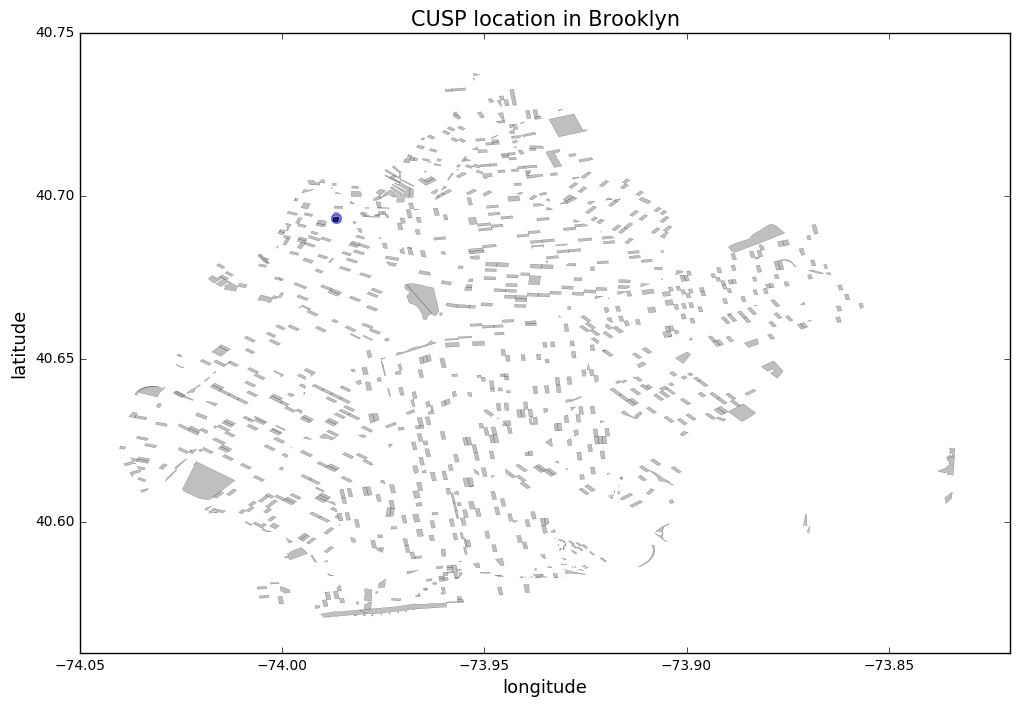

In [14]:
fig, ax = plt.subplots(1, figsize = (12,8))
ct_shape_brooklyn[::10].plot(ax=ax, color = 'grey', linewidth=0.1)
cusp_ct.T.plot(ax=ax, color = 'black')
plt.scatter(cusp.x, cusp.y, color = 'blue', s =50, alpha= 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56, 40.75)
plt.xlabel('longitude', fontsize = 13)
plt.ylabel('latitude', fontsize = 13)
plt.title('CUSP location in Brooklyn', fontsize = 15)
plt.show()

### Figure1: The above map shows some census tracts of Brooklyn Borough and the blue point shows the position of CUSP(1 Metrotech Center, Brooklyn). The red polygon is the census tract of CUSP. CUSP is located in the north east part of Brooklyn